# Twitter Data Analysis for #covid19

__Last Updated: 03-Apr-2020__

##   __Content Structure :__
- Problem Statement
- Dataset
- Modeling Technique
- Data Preperation and Exploratory Data Anlysis
- Final Output

## Problem Statement
__Introduction:__ Social media has become one of the biggest platforms to present your views. People are using social media plateform to express their openion and view points infront of whole world. But it is a tedious task to go through each of the feed manually and understand the peoplr perspective. Thus is required an automated algorithm that can go through each consumer feed and automatically gives out the topics discussed and their sentiments. The purpose of this exercise is to study the people's openion and understand the overall sentiment (summarized into positive, negative and neutral) and also identify the main discussion area so that that informatiopn can be used to . The exercise also aims to identify topics from the conversation to understand people's opinions, experiences and expectations based on social consumer feeds.

## Dataset 
included "#covid19" 24800, "#Coronavirus" 25100,"#SARSCoV2" 1464   == 51364
__Dataset:__ (https://...) consists 65167 twitter feeds. The data is extracted from twitter using free source python package called "GetOldTweets3". The time period chosen is O6 April 2020. Each line represents one customer feed- the first column represents the date followed by username, reply, retweets, favorite, text, geo location, mentions, hashtags, id, permalinks. The customer feeds are segregated from Yas Island feeds to carry the analysis. 



## Methodology
The overall exercise is divided into 2 parts:
    1. Predict the sentiment related to the twitter feed
        a. free source python package vadersentiment is used to calculate the polarity scores 
        b. if polarity score is < -0.5, it is classified as "Negative", if it is between -0.5 and 0.5 then "Neutral", if it is > 0.5 then "Positive".
    2. identify the topics based on the conversations.
        a. each term is categorized into a topic based on the probability.
        b. each document(row) is categorized into a topic based on the sum of probabilities of the terms in the document.

## Result
- A bar graph to show the overall sentiment
- Topics and terms falling in those topics
- Intertopic Distance Map (via multidimensional scaling) to show each terms contribution in the topic

## Environment Details

%version_information GetOldTweets3, matplotlib, nltk, numpy, pandas, pyLDAvis, scikit

- GetOldTweets3=0.0.9
- matplotlib=3.0.2
- nltk=3.4
- numpy=1.16.3
- pandas=0.23.4
- pyLDAvis=2.1.2
- scikit=0.20.1



### Extract Tweets Using Keyword "Covid19","Coronavirus","SARSCoV2"

In [72]:
#!GetOldTweets3 --querysearch "#Coronavirus" --lang en  --maxtweets 50000

### Import Libraries

In [73]:
import pandas as pd

import nltk, re, pprint
from nltk import word_tokenize
import random
import numpy  as np

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
%matplotlib inline

### Import Data

In [74]:
df1 =  pd.read_csv("data/1_Covid19_output_got.csv", encoding = "ISO-8859-1")
df2 =  pd.read_csv("data/3_Coronavirus_output_got.csv", encoding = "ISO-8859-1")
df3 =  pd.read_csv("data/2_SARSCoV2_output_got.csv", encoding = "ISO-8859-1")

In [75]:
df3.shape

(1464, 12)

In [76]:
df  = pd.concat([df1,df2,df3])

In [77]:
df.head(4)

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,2020-04-06 14:42:53,BLGLaw,NaN,0,0,0,â#COVID19 has led to extraordinary demand fo...,NaN,NaN,#COVID19,1247172934822699010,https://twitter.com/BLGLaw/status/124717293482...
1,2020-04-06 14:42:53,JPCTumblr,NaN,0,0,0,Delusional Donnie is at it again: There is NOT...,NaN,NaN,#COVID19,1247172933086314496,https://twitter.com/JPCTumblr/status/124717293...
2,2020-04-06 14:42:52,arielinwonderl1,NaN,0,0,0,Courage to the people working hard since weeks...,NaN,NaN,#world #stayathome #staysafe #takecare #corona...,1247172931035246593,https://twitter.com/arielinwonderl1/status/124...
3,2020-04-06 14:42:52,AndreinaSeijas,NaN,0,0,0,Listening to the #city in a global pandemic - ...,NaN,NaN,#city #urbanplanning #cities #COVID19,1247172930854957058,https://twitter.com/AndreinaSeijas/status/1247...


In [78]:
df.text

0       â#COVID19 has led to extraordinary demand fo...
1       Delusional Donnie is at it again: There is NOT...
2       Courage to the people working hard since weeks...
3       Listening to the #city in a global pandemic - ...
4       by compassionately conveyed multilateral commu...
                              ...                        
1459    Scientists have been exploring whether pets ca...
1460    #Coronavirus #COVID19 FLORIDA Follow my lists:...
1461    In this amazing #epidemic #mapping @NYTimes is...
1462    #BREAKING Hadju set up a drug prevention progr...
1463    More information is becoming available about t...
Name: text, Length: 51364, dtype: object

In [79]:
# df1=df[df.username !="WaltDisneyWorld"]
# df1=pd.DataFrame(df)

In [80]:
df1 = df.copy()

In [81]:
df1['text'] = df1.text.astype(str)

## Data Preprocessing

In [82]:
import pandas as pd
import time
import stop_words
import os
import sys
import itertools as it
import re
import string
from string import punctuation
from nltk.corpus import stopwords
import gensim
import gensim.utils
import gensim.corpora as corpora
from gensim import models
import pyLDAvis
import pyLDAvis.gensim

In [83]:
#Removing Hashtags
df1["clean_text"] = df1["text"].str.replace('[^A-Za-z]+', ' ')
df1["clean_text"] = df1["clean_text"].str.lower()
df1.clean_text

0        covid has led to extraordinary demand for med...
1       delusional donnie is at it again there is not ...
2       courage to the people working hard since weeks...
3       listening to the city in a global pandemic gre...
4       by compassionately conveyed multilateral commu...
                              ...                        
1459    scientists have been exploring whether pets ca...
1460     coronavirus covid florida follow my lists hea...
1461    in this amazing epidemic mapping nytimes is a ...
1462     breaking hadju set up a drug prevention progr...
1463    more information is becoming available about t...
Name: clean_text, Length: 51364, dtype: object

In [84]:
import string
import re
import nltk
from nltk.tokenize import TweetTokenizer

In [85]:
def clean_text(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text)
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return text_no_doublespace


def processWord(word):
    '''
    Process each word such as Lemmatization
    '''
    # lemmatization
    return wml.lemmatize(word)

# cleaned_tweet = clean_text(tweet)

# tt = TweetTokenizer()
# print(tt.tokenize(cleaned_tweet)

<>:8: DeprecationWarning: invalid escape sequence \s
<>:8: DeprecationWarning: invalid escape sequence \s
<>:8: DeprecationWarning: invalid escape sequence \s
<ipython-input-85-6618968540b4>:8: DeprecationWarning: invalid escape sequence \s
  text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()


In [86]:
df1['clean_text'] = df1['clean_text'].apply(clean_text)

In [87]:
import re, string, unicodedata
import nltk
import contractions
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [88]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    return words



In [89]:
# df1['clean_text'] = df1['clean_text'].apply(normalize)

In [90]:
df1.head(4)

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink,clean_text
0,2020-04-06 14:42:53,BLGLaw,NaN,0,0,0,â#COVID19 has led to extraordinary demand fo...,NaN,NaN,#COVID19,1247172934822699010,https://twitter.com/BLGLaw/status/124717293482...,covid has led to extraordinary demand for medi...
1,2020-04-06 14:42:53,JPCTumblr,NaN,0,0,0,Delusional Donnie is at it again: There is NOT...,NaN,NaN,#COVID19,1247172933086314496,https://twitter.com/JPCTumblr/status/124717293...,delusional donnie is at it again there is not ...
2,2020-04-06 14:42:52,arielinwonderl1,NaN,0,0,0,Courage to the people working hard since weeks...,NaN,NaN,#world #stayathome #staysafe #takecare #corona...,1247172931035246593,https://twitter.com/arielinwonderl1/status/124...,courage to the people working hard since weeks...
3,2020-04-06 14:42:52,AndreinaSeijas,NaN,0,0,0,Listening to the #city in a global pandemic - ...,NaN,NaN,#city #urbanplanning #cities #COVID19,1247172930854957058,https://twitter.com/AndreinaSeijas/status/1247...,listening to the city in a global pandemic gre...


In [91]:
stopword = set(stopwords.words('english'))
stopword_update = [item for item in stop_words.get_stop_words('en') if item not in nltk.corpus.stopwords.words('english')]
stop_list = set(['http', 'com', 'c', 'wa', 'aahahahahahahah', 'r', 'sq', 'que', 'www', 'ad','covid','coronavirus','coronaviru','bit',
                'http', 'https', 'twitter', 'le', 'di', 'il', 'yas', 'ow', 'rn', 'et', 'gl', 'es', 'alo','b','us','uk','sarscov',
                'goo', 'la', 'el', 'ig', 'por', 'igshid', 'ly', 'ff', 'est', 'utm', 'hi', 'th', 'en', 'tw','igshid','aaa','aaaaaand','aaabag',
                 'aaadgcurwp','aaaitaly','aaaj','aaans','aaarggh','aaarmyhyd','aaas','aab', 'aabkopt','aabkwtb','aablfpu','aaboltaabol','aac',
                 'aacaboston','aacc','aacclydespace','aacevedo','aacf','aachristcollab','aacommission','aacopd','aad','aada','aadd','aadhaar',
                 'aadilzaman','abe',])
stopword.update(stop_list)
stopword.update(set(stopword_update))

In [92]:
df1['clean_text'] = df1['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopword) and len(word) > 2]))

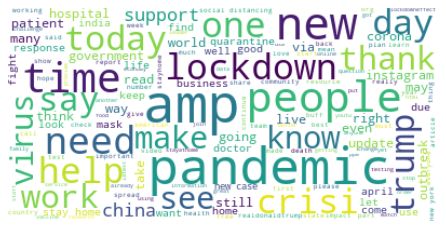

In [93]:
from wordcloud import WordCloud, STOPWORDS

# join tweets to a single string
words_all = ' '.join(df1['clean_text'])

from matplotlib import pyplot as plt

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="white").generate(words_all)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('./my_twitter_wordcloud_1.png', dpi=300)
plt.show()

In [94]:
import collections

counted_words = collections.Counter(words_all.split())
words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

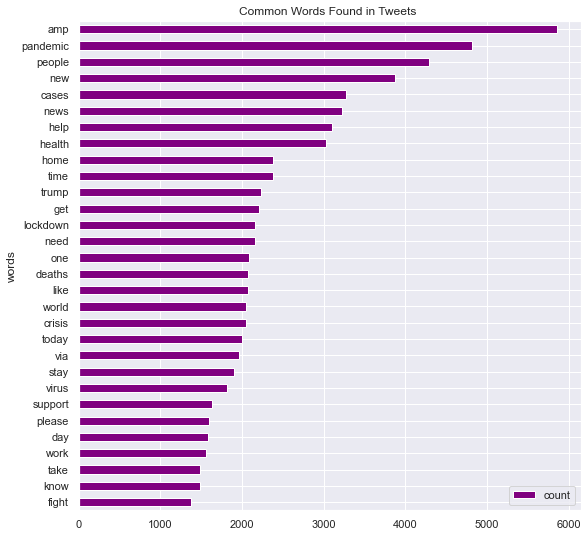

In [95]:
counted_words.most_common(50)
clean_tweets = pd.DataFrame(counted_words.most_common(30),
                             columns=['words', 'count'])

clean_tweets.head()

fig, ax = plt.subplots(figsize=(9, 9))

# Plot horizontal bar graph
clean_tweets.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets ")
plt.savefig('./word_count.png', dpi=400)
plt.show()


In [96]:
list(clean_tweets.words)[:10]

['amp',
 'pandemic',
 'people',
 'new',
 'cases',
 'news',
 'help',
 'health',
 'home',
 'time']

# Sentiment Analysis 

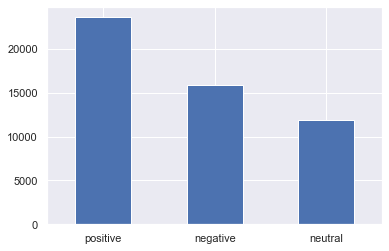

In [97]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score
    #print("{:-<40} {}".format(sentence, str(score)))


def get_sentiment(compound):
    if compound >= 0.05 :
        return "positive"
    if compound > -0.05 and compound < 0.05:
        return "neutral"
    if compound < -0.05:
        return "negative"


scores=[]
sentiments=[]
for tweet in df1['clean_text'].values:
    score = sentiment_analyzer_scores(tweet)
    sentiment = get_sentiment(score["compound"])
    sentiments.append(sentiment)
    scores.append(score)
    
    

df1['sentiments']=sentiments
df1['polarity']=scores
### People Sentiments



df1['sentiments'].value_counts().plot(kind='bar', rot=0);

#df1.to_excel("Covid_Sentimnents.xlsx")

In [98]:
df1[['clean_text','polarity','sentiments']]

,clean_text,polarity,sentiments
0,led extraordinary demand medical equipment sup...,"{'neg': 0.213, 'neu': 0.709, 'pos': 0.078, 'co...",negative
1,delusional donnie gonna light end tunnel anyti...,"{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compou...",positive
2,courage people working hard since weeks medica...,"{'neg': 0.038, 'neu': 0.545, 'pos': 0.417, 'co...",positive
3,listening city global pandemic great insights ...,"{'neg': 0.072, 'neu': 0.763, 'pos': 0.165, 'co...",positive
4,compassionately conveyed multilateral communic...,"{'neg': 0.169, 'neu': 0.728, 'pos': 0.103, 'co...",negative
...,...,...,...
1459,scientists exploring whether pets contract pre...,"{'neg': 0.142, 'neu': 0.71, 'pos': 0.148, 'com...",neutral
1460,florida follow lists health ninatypewriter lis...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
1461,amazing epidemic mapping nytimes list clusters...,"{'neg': 0.12, 'neu': 0.62, 'pos': 0.259, 'comp...",positive
1462,breaking hadju set drug prevention program amp...,"{'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'comp...",positive


In [ ]:
# https://medium.com/@bedigunjit/simple-guide-to-text-classification-nlp-using-svm-and-naive-bayes-with-python-421db3a72d34